In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
#Part 1: Exploratory Data Analysis

data = pd.read_json('logins.json')

In [3]:
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
#Add column of 1s

data['count'] = 1


In [5]:
data.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [6]:
data = data.set_index(pd.DatetimeIndex(data['login_time']))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 2 columns):
login_time    93142 non-null datetime64[ns]
count         93142 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 MB


In [8]:
data_resampled = data.resample('15T').sum()

data_resampled.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0,0.5,'Frequency of Logins')

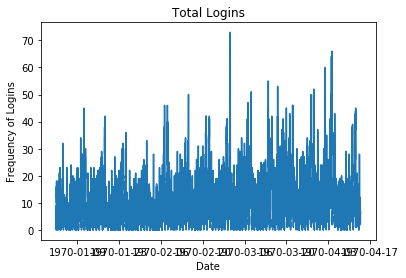

In [9]:
plt.plot(data_resampled)
plt.title('Total Logins')
plt.xlabel('Date')
plt.ylabel('Frequency of Logins')

Text(0,0.5,'Frequency of Logins')

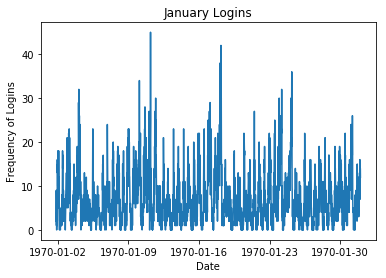

In [10]:
#January Logins linegraph
start = datetime.datetime.strptime('1970-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end = datetime.datetime.strptime('1970-02-01 00:00:00', '%Y-%m-%d %H:%M:%S')

jan = data_resampled.loc[start:end]

plt.plot(jan)
plt.title('January Logins')
plt.xlabel('Date')
plt.ylabel('Frequency of Logins')

Text(0,0.5,'Frequency of Logins')

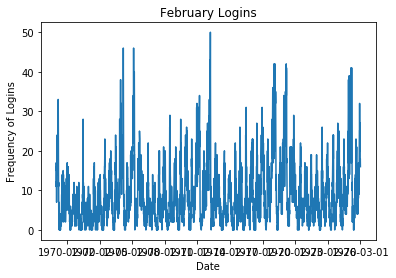

In [11]:
#February Logins linegraph
start = datetime.datetime.strptime('1970-02-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end = datetime.datetime.strptime('1970-03-01 00:00:00', '%Y-%m-%d %H:%M:%S')

feb = data_resampled[start:end]

plt.plot(feb)
plt.title('February Logins')
plt.xlabel('Date')
plt.ylabel('Frequency of Logins')

Text(0,0.5,'Frequency of Logins')

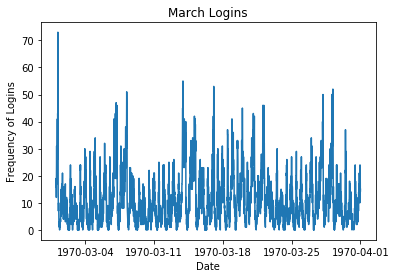

In [12]:
#March Logins linegraph
start = datetime.datetime.strptime('1970-03-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end = datetime.datetime.strptime('1970-04-01 00:00:00', '%Y-%m-%d %H:%M:%S')

mar = data_resampled[start:end]

plt.plot(mar)
plt.title('March Logins')
plt.xlabel('Date')
plt.ylabel('Frequency of Logins')

Text(0,0.5,'Frequency of Logins')

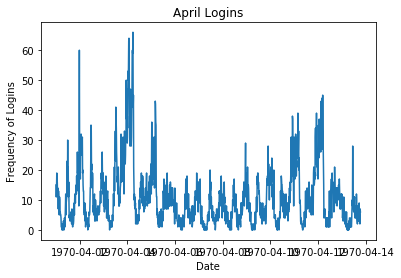

In [13]:
#Apr Logins linegraph
start = datetime.datetime.strptime('1970-04-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end = datetime.datetime.strptime('1970-05-01 00:00:00', '%Y-%m-%d %H:%M:%S')

apr = data_resampled[start:end]

plt.plot(apr)
plt.title('April Logins')
plt.xlabel('Date')
plt.ylabel('Frequency of Logins')

Text(0,0.5,'Frequency of Logins')

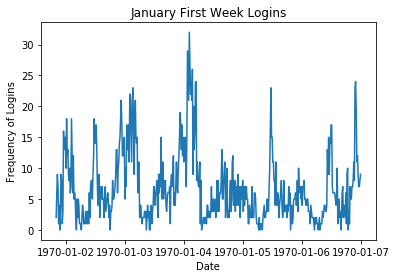

In [14]:
#Taking a closer look at daily habits for Jan set

start = datetime.datetime.strptime('1970-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end = datetime.datetime.strptime('1970-01-07 00:00:00', '%Y-%m-%d %H:%M:%S')

jan_week = data_resampled[start:end]

plt.plot(jan_week)
plt.title('January First Week Logins')
plt.xlabel('Date')
plt.ylabel('Frequency of Logins')

There seems to be a cyclical nature, so let's zoom in

Text(0,0.5,'Frequency of Logins')

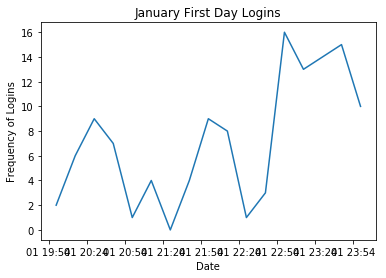

In [15]:
#Zooming in on Jan 1

start = datetime.datetime.strptime('1970-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end = datetime.datetime.strptime('1970-01-02 00:00:00', '%Y-%m-%d %H:%M:%S')

jan_day = data_resampled[start:end]

plt.plot(jan_day)
plt.title('January First Day Logins')
plt.xlabel('Date')
plt.ylabel('Frequency of Logins')

Text(0,0.5,'Frequency of Logins')

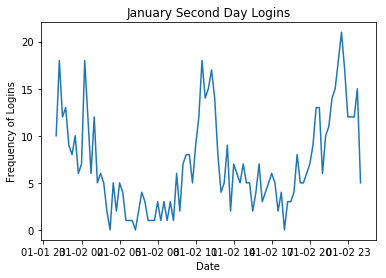

In [16]:
#Zooming in on Jan 2

start = datetime.datetime.strptime('1970-01-02 00:00:00', '%Y-%m-%d %H:%M:%S')
end = datetime.datetime.strptime('1970-01-03 00:00:00', '%Y-%m-%d %H:%M:%S')

jan_second_day = data_resampled[start:end]

plt.plot(jan_second_day)
plt.title('January Second Day Logins')
plt.xlabel('Date')
plt.ylabel('Frequency of Logins')

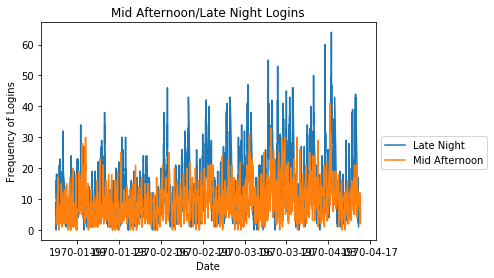

In [17]:
#Let's try graphing late nights and mid afternoons

late_night = data_resampled.between_time('20:00', '04:00')
mid_afternoon = data_resampled.between_time('12:00', '20:00')


plt.plot(late_night)
plt.plot(mid_afternoon)

plt.title('Mid Afternoon/Late Night Logins')
plt.xlabel('Date')
plt.ylabel('Frequency of Logins')
plt.legend(('Late Night', 'Mid Afternoon'), loc = 0, bbox_to_anchor=(1, 0.5))


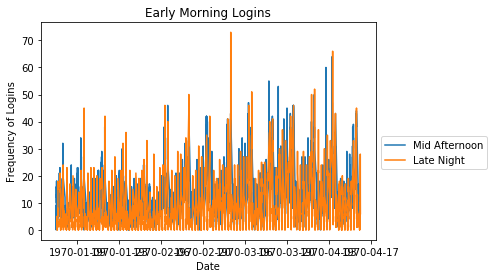

In [18]:
#early morning trips
late_night = data_resampled.between_time('20:00', '04:00')
early_morning = data_resampled.between_time('04:00', '12:00')

plt.plot(late_night)
plt.plot(early_morning)
plt.title('Early Morning Logins')
plt.xlabel('Date')
plt.ylabel('Frequency of Logins')
plt.legend(('Mid Afternoon', 'Late Night', ), loc = 0, bbox_to_anchor=(1, 0.5))

Text(0,0.5,'Frequency of Logins')

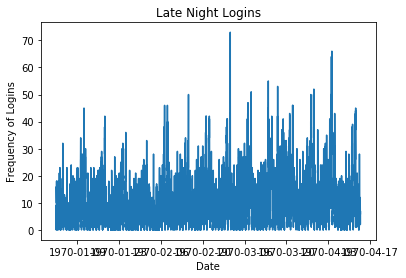

In [19]:
#Let's try graphing from 00:00:00 to 22:30:00

early = data_resampled.between_time('00:00', '23:00')

plt.plot(early)
plt.title('Late Night Logins')
plt.xlabel('Date')
plt.ylabel('Frequency of Logins')

Part 1) Exploratory Data Analysis

1. The strongest insights we can gain from this EDA is that the data is highly concentrated in certain pockets of the day. We get ideas for where this might be by zooming in from the full scope of the dataset (4 months) to one week, then one day. After taking a look into a couple days, I formed a hypothesis that there are spikes in logins in the late evening, early morning, and mid day. Thus, I extracted those time periods and graphed them as a time series.

In doing so, it is fairly clear that late night logins has higher frequencies than mid afternoons. Also, early morning logins has slightly higher frequencies than that of late night logins.

Part 2) Experiment and Metrics Design

1. The key metric that we can measure to see if this program of reimbursing tolls is successful is the proportion of trips where the ride goes across the toll bridge. Because the goal is to increase activity across the two cities, this would serve as a solid metric for how much reimbursing the toll actually affects ridership.

2. a) As the people of both cities are, for the most part, exclusive to each city, it makes sense to compare apples with apples. Thus, if we want to run a hypothesis test (difference of means), we want to make sure that we compare samples with a population with the same timeframe (weekday/weekend) and city of origin. Since the total number of reimbursements tells us how many times a driver went across the bridge, we simply need to put that number of the total number of rides to arrive at a proportion.

b) We can run a binomial hypothesis test, where p is the probability of a trip being a toll-expensed trip. Since we already have the population data, we can compare the two, with the null hypothesis being that the probability is the total proportion of trips on weekdays and the alternate hypothesis being that p is greater than the total proportion of trips on weekdays. From there, we can generate a P-value to determine whether we reject the null hypothesis or fail to reject it.

c) The core purpose of the experiment is to determine, to whatever value of alpha we decide, whether there is a statistically significant difference in ridership when tolls are reimbursed. The key question after is, is it worth it? The goals of the program are most important. If driver partners are more willing to take someone across the bridge, do the benefits of that outweigh the cost of the program?

In [20]:
#Part 3
import json

with open('ultimate_data_challenge.json') as f:
   data = json.load(f)

ultimate_data = pd.DataFrame(data)



ultimate_data.head()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [21]:
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


To answer part 1, we only really need to use the "last_trip_date" column to figure out the retention rate, and since there are 50,000 values out of 50,000 available, we don't need to call the .dropna() function

In [22]:
#Find last rider's date so we can figure out 30 days from before that to calculate retention

ultimate_data.last_trip_date.max()

'2014-07-01'

In [23]:
#Find how many riders have last ridden after 6/1

retention = ultimate_data[ultimate_data.last_trip_date > '2014-06-01']

retention.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18310 entries, 0 to 49995
Data columns (total 12 columns):
avg_dist                  18310 non-null float64
avg_rating_by_driver      18276 non-null float64
avg_rating_of_driver      16742 non-null float64
avg_surge                 18310 non-null float64
city                      18310 non-null object
last_trip_date            18310 non-null object
phone                     18180 non-null object
signup_date               18310 non-null object
surge_pct                 18310 non-null float64
trips_in_first_30_days    18310 non-null int64
ultimate_black_user       18310 non-null bool
weekday_pct               18310 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 1.7+ MB


In [25]:
retention_rate = 100 * len(retention.last_trip_date)/len(ultimate_data.last_trip_date)

print('Retention Rate (%): ' + str(retention_rate))

Retention Rate (%): 36.62


Part 3 Question 1)

Retention is about 37/100

In [26]:
#Part 2 - building a predictive model for the data

#create column called "retained" of 1's and 0's - 1 if user is retained, 0 if not.

#make a retained method to apply to "retained" column
def retained(i):
    if i > '2014-06-01':
        return 1
    else:
        return 0

#Make a copy of last_trip_date column to run method over
ultimate_data['retained'] = ultimate_data['last_trip_date']

ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null object
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 4.6+ MB


In [27]:
ultimate_data.retained = ultimate_data.retained.apply(retained)

In [28]:
ultimate_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [31]:
#drop na values

ultimate_data = ultimate_data.dropna()

ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 13 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
retained                  41445 non-null int64
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.2+ MB


In [32]:
#Need to get users who signed up in first month, since we are building a predictive model of people's behaviors 6 months later

ultimate_data_prediction = ultimate_data[ultimate_data.signup_date < '2014-02-01']

ultimate_data_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 13 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
retained                  41445 non-null int64
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.2+ MB


In [33]:
ultimate_data_prediction.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [35]:
#We can assign integer values to each of the cities so we can use the categorical data as part of the model

def city_value(i):
    if i == 'King\'s Landing':
        return 0
    if i == 'Astapor':
        return 1
    if i == 'Winterfell':
        return 2

def boolean(i):
    if i == True:
        return 1
    if i == False:
        return 0

#run city_value method on city column
ultimate_data_prediction.city = ultimate_data_prediction.city.apply(city_value)
ultimate_data_prediction.ultimate_black_user = ultimate_data_prediction.ultimate_black_user.apply(boolean)

ultimate_data_prediction.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,0,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,1
1,8.26,5.0,5.0,1.00,1,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,0
2,0.77,5.0,4.3,1.00,1,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,0,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,1
4,3.13,4.9,4.4,1.19,2,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


All users have signed up before Feb 1

In [38]:
#Use Random Forest and Gradient Boosting to figure out which factors are most heavily weighted - then we can reduce dimensions accordingly if some factors are stronger than others

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


def gbc(data):
    X, Xtest, y, ytest = train_test_split(data[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'city', 'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']], data.retained.values, random_state=5, test_size = 0.2)
    clf = GradientBoostingClassifier()
    clf.fit(X, y)
    print('Test score (Gradient Boosting): ' + str(clf.score(Xtest, ytest)))
    print('Feature Importances (Gradient Boosting): ' + str(clf.feature_importances_))
    
    
def rfc(data):
    X, Xtest, y, ytest = train_test_split(data[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'city', 'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']], data.retained.values, random_state=5, test_size = 0.2)
    clf = RandomForestClassifier()
    clf.fit(X, y)
    print('Test score (Random Forest): ' + str(clf.score(Xtest, ytest)))
    print('Feature Importances (Random Forest): ' + str(clf.feature_importances_))

In [39]:
gbc(ultimate_data_prediction)
rfc(ultimate_data_prediction)

Test score (Gradient Boosting): 0.7717456870551334
Feature Importances (Gradient Boosting): [0.13522914 0.10432698 0.05012349 0.04344038 0.14940958 0.13670368
 0.11104016 0.0727016  0.19702499]
Test score (Random Forest): 0.7319338882856798
Feature Importances (Random Forest): [0.29294426 0.11393813 0.07979229 0.08823701 0.07677141 0.08417083
 0.07956393 0.0369638  0.14761833]


Gradient boosting shows that avg_dist, city, surge_pct, and weekday_pct are most important factors, with accuracy of about 77%

Random Forest shows that avg_dist, avg_rating_by_driver, and weekday_pct are most important factors, with accuracy of about 73%

In [41]:
#Run another model with reduced dimensions - Gradient Boosting

X, Xtest, y, ytest = train_test_split(ultimate_data_prediction[['avg_dist', 'city', 'surge_pct', 'weekday_pct']], ultimate_data_prediction.retained.values, random_state=5, test_size = 0.2)
clf = GradientBoostingClassifier()
clf.fit(X, y)
print('Test score (Gradient Boosting): ' + str(clf.score(Xtest, ytest)))
print('Feature Importances (Gradient Boosting): ' + str(clf.feature_importances_))
    

Test score (Gradient Boosting): 0.7543732657739173
Feature Importances (Gradient Boosting): [0.232703   0.14975665 0.20857473 0.40896562]


In [47]:
#Run another model with reduced dimensions - Gradient Boosting

X, Xtest, y, ytest = train_test_split(ultimate_data_prediction[['avg_dist', 'surge_pct', 'weekday_pct']], ultimate_data_prediction.retained.values, random_state=5, test_size = 0.2)
clf = GradientBoostingClassifier()
clf.fit(X, y)
print('Test score (Gradient Boosting): ' + str(clf.score(Xtest, ytest)))
print('Feature Importances (Gradient Boosting): ' + str(clf.feature_importances_))

Test score (Gradient Boosting): 0.7431535770297986
Feature Importances (Gradient Boosting): [0.23433122 0.29822788 0.4674409 ]


In [49]:
X, Xtest, y, ytest = train_test_split(ultimate_data_prediction[['avg_dist', 'avg_rating_by_driver', 'weekday_pct']], ultimate_data_prediction.retained.values, random_state=5, test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(X, y)
print('Test score (Random Forest): ' + str(clf.score(Xtest, ytest)))
print('Feature Importances (Random Forest): ' + str(clf.feature_importances_))

Test score (Random Forest): 0.6743877427916516
Feature Importances (Random Forest): [0.55527348 0.17145575 0.27327077]


Part 3) Question 2) 

   I chose to use Random Forest and Gradient Boosting so I can better understand the weightings of each dimension. I first ran models through both ML methodologies to figure out the weights of all variables, then I reduced the number of dimensions to see if the accuracy increased. Surprisingly, the model's accuracy decreased when the number of dimensions decreased, which means that the model underfits the data when the number of dimensions is smaller.

Gradient boosting produced the highest test score at ~77%, with the most important variable being the percent of user's trips occurring during a weekday.

Part 3 Question 3)

Ultimate can use the weightings of the dimensions to figure out how they can approach a marketing strategy to find people who fit the highly weighted dimensions the best. For example, people who regularly call a ride on weekdays are an important demographic, as these people most likely use it in an urban setting to go to work. Thus, the company can run a marketing campaign that targets people that have a career in urban areas.